# Text Analytics in Python Using NLTK and Gensim

The purpose of this notebook is to show some Text Analytics strategies that you can use with the NLTK and Gensim packages in python. In addition, the notebook was written with a plug and play application is mind. What this means is that if you have another dataset that you want to use with this notebook, you only need to change a few code cells to run the same analysis (the csv file being read in, the name of the column that contains the reviews, and the word dictionaries if doing Rule Based Categorization). Below is the table of contents for this notebook. 

### Introduction
1. Reading in the Data

### Pre-analysis Definitions
1. Stemming
2. Lemmatization
3. Tokenization
4. Stop Words

### Data Preprocessing
1. Preparing data for tokenization
2. Tokenizing, Stemming/Lemmatizing, and Removing Stop Words
3. Word Frequencies
4. N-grams

### Topic Modelling with Gensim
1. Topic Modelling
2. Assigning Comments to Topics

### Rule Based Categorization
2. Tagging Basics
3. Negation and Secondary Terms
4. Applying Tags

## Introduction

To show off the functionailty of NTLK and Gensim, we will use a sample Hotel's dataset from kaggle (https://www.kaggle.com/datafiniti/hotel-reviews/). It is a list of 1,000 hotels and their reviews provided by Datafiniti's Business Database. The dataset includes hotel location, name, rating, review data, title, and username, among other fields.  

### Reading in the Data

To start, we need to import the dictionaries we need and read in the dataset.

In [17]:
import pandas as pd
import string
import nltk
import warnings
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('stopwords')
warnings.filterwarnings('ignore')

data = pd.read_csv('Datafiniti_Hotel_Reviews.csv') 
data = data.dropna(subset=['reviews.text'])

To get a sense of what the reviews look like, we print out the first three comments in the dataset

In [18]:
print('Number of reviews: {}\n'.format(len(data)))
print('Example reviews: \n')
for i in data['reviews.text'].iloc[0:3]:
    print(i)
    print('\n')

Number of reviews: 9999

Example reviews: 

Our experience at Rancho Valencia was absolutely perfect from beginning to end!!!! We felt special and very happy during our stayed. I would come back in a heart beat!!!


Amazing place. Everyone was extremely warm and welcoming. We've stayed at some top notch places and this is definitely in our top 2. Great for a romantic getaway or take the kids along as we did. Had a couple stuffed animals waiting for our girls upon arrival. Can't wait to go back.


We booked a 3 night stay at Rancho Valencia to play some tennis, since it is one of the highest rated tennis resorts in America. This place is really over the top from a luxury standpoint and overall experience. The villas are really perfect, the staff is great, attention to details (includes fresh squeezed orange juice each morning), restaurants, bar and room service amazing, and the tennis program was really impressive as well. We will want to come back here again.




## Pre-Analysis Definitions

Before diving into the analysis, we must first define the following terms: **Stemming**, **Lemmatization**, and **Tokenization**

### Stemming

Stemming is the process by which a word is reduced to its word stem. The purpose of stemming (and also lemmatization) is to reduce a word to its core root. Reducing a word to its core root allows a text analytics algorithm to group words with similar meaning together in order to improve accuracy.

In ```NLTK```, there are multiple stemming algorithms available to use. For this notebook, we will be showing ```PorterStemmer``` and ```LancasterStemmer```. First, we define a stem object for both Porter and Lancaster stemming:

In [19]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter = PorterStemmer()
lancaster = LancasterStemmer()

Below is an example of how the ```PorterStemmer``` takes an example word, **stay**, and its various ending combinations, and simplifes them to the core word **stay**

In [20]:
print('Porter Stemming Example with "stay"')
print('stay --> {}'.format(porter.stem("stay")))
print('stayed --> {}'.format(porter.stem("stayed")))
print('stays --> {}'.format(porter.stem("stays")))
print('staying --> {}'.format(porter.stem("staying")))

Porter Stemming Example with "stay"
stay --> stay
stayed --> stay
stays --> stay
staying --> stay


The ```PorterStemmer``` is known for it's speed and simplicity, and is typically used in Information Retrieval Environments where fast recall and fetching of search queries is important. On the other hand, the Lancaster stemmer is more aggressive in stemming words.

In [21]:
print('Porter Stemming Example with "destabilize"')
print('destabilized --> {}'.format(porter.stem("destabilized")))
print('destabilize --> {}'.format(porter.stem("destabilize")))
print('destabilizing --> {}'.format(porter.stem("destabilizing")))
print('destabilizes --> {}'.format(porter.stem("destabilizes")))

Porter Stemming Example with "destabilize"
destabilized --> destabil
destabilize --> destabil
destabilizing --> destabil
destabilizes --> destabil


Lancaster here stems the word destabilize to **dest**

In [22]:
print('Lancaster Stemming Example with "destabilize"')
print('destabilized --> {}'.format(lancaster.stem("destabilized")))
print('destabilize --> {}'.format(lancaster.stem("destabilize")))
print('destabilizing --> {}'.format(lancaster.stem("destabilizing")))
print('destabilizes --> {}'.format(lancaster.stem("destabilizes")))

Lancaster Stemming Example with "destabilize"
destabilized --> dest
destabilize --> dest
destabilizing --> dest
destabilizes --> dest


The **PorterStemmer** and **LancasterStemmer** has disadvantages, namely that 

1. The words sometimes do not stem to actual words
2. Linguistic meaning can sometimes be lost

The example below with **university** and **universe** illustrates this point

In [23]:
print('Porter Stemming Example with "university" and "universe"')
print('university --> {}'.format(porter.stem("university")))
print('universal --> {}'.format(porter.stem("universal")))
print('universities --> {}'.format(porter.stem("universities")))
print('universe --> {}'.format(porter.stem("universe")))

Porter Stemming Example with "university" and "universe"
university --> univers
universal --> univers
universities --> univers
universe --> univers


In [24]:
print('Lancaster Stemming Example with "university" and "universe"')
print('university --> {}'.format(lancaster.stem("university")))
print('universal --> {}'.format(lancaster.stem("universal")))
print('universities --> {}'.format(lancaster.stem("universities")))
print('universe --> {}'.format(lancaster.stem("universe")))

Lancaster Stemming Example with "university" and "universe"
university --> univers
universal --> univers
universities --> univers
universe --> univers


As you can see above, the words university and universe simplify to *univers*, and difference in meaning between the two words is lost. One way to remedy this problem is with Lemmatization 

### Lemmatization

Sometimes, instead of getting the stem of a word, which might not be an actual word, we can lemmetize our words to make sure that the words are grouped into an actual language word. Whereas the word **"pictures"** might stem to something like **"pictur"**, in lemmatization it would shorten to **"picture"**. This grouping is useful for keeping the full linguistic context of a word as opposed to just keeping the root of a word.

In the ```NLTK``` package we can use ```WordNetLemmatizer``` to lemmatize our words

In [25]:
from nltk.stem import WordNetLemmatizer   
lemmatizer = WordNetLemmatizer() 

Going back to the example of university and universe, we see that Lemmatization ensures that we retain linguistic meaning while still grouping words where possible

In [26]:
print('Lemmatization Example with "university" and "universe"')
print('university --> {}'.format(lemmatizer.lemmatize("university")))
print('universal --> {}'.format(lemmatizer.lemmatize("universal")))
print('universities --> {}'.format(lemmatizer.lemmatize("universities")))
print('universe --> {}'.format(lemmatizer.lemmatize("universe")))

Lemmatization Example with "university" and "universe"
university --> university
universal --> universal
universities --> university
universe --> universe


So how do we decide which strategy to use when grouping similar words? When is stemming more advantagous to use when compared with lemmatization? The answer depends your application, and the importance of retaining linguistic meaning vs. having more simplified word groupings and reducing the number of features in your algorithm. If you cut off too much of the ending of a word (**overstemming**) you may have more nonsensical terms in your output and/or lose linguistic meaning. If you cut off too little from the ending of a word (**understemming**), then you may not be grouping enough similar words together and thus open your model up to potential overfitting.

### Tokenization

*What is tokenization?*
* Tokenization is when you take a string of text, and make each word an item in a list so each word can be analyzed individually
* **EXAMPLE:** ```"Our experience at Rancho Valencia was absolutely perfect from beginning to end!!!!" --> ['our','experience','at','rancho','valencia','was', 'absolutely','perfect','from', 'beginning', 'to', 'end']```

*Why do we use tokenization?*
* It is the general format used for many text analysis techniques in NTLK, including Frequency Distribution and  N-Grams, among other techniques

In ```NTLK```, you can tokenize a string of text using ```word_tokenize```

In [27]:
sample_string = 'Our experience at Rancho Valencia was absolutely perfect from beginning to end'
sample_token = nltk.word_tokenize(sample_string.lower())

print('Raw Comment: "Our experience at Rancho Valencia was absolutely perfect from beginning to end"')
print('Cleaned Comment: {}'.format(sample_token))

Raw Comment: "Our experience at Rancho Valencia was absolutely perfect from beginning to end"
Cleaned Comment: ['our', 'experience', 'at', 'rancho', 'valencia', 'was', 'absolutely', 'perfect', 'from', 'beginning', 'to', 'end']


### Stop Words

One issue that adds a lot of noise to a text analytics model are common words that appear in many comments but often add little contextual meaning. Examples of common words are "the", "at", "a", "an". These words are known as **stop words**. Fortunately, ```NTLK``` has a pre-defined corpus of stop words, ```nltk.corpus.stopwords.words('english')```, which you can you to filter out these common words from your text data. Below is a subset of words within the ```NLTK``` stop words corpus

In [28]:
print('First 10 stop words in the NLTK Stop Words Corpus (English):')
print(nltk.corpus.stopwords.words('english')[0:10])

First 10 stop words in the NLTK Stop Words Corpus (English):
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


Here is an example of applying ```nltk.corpus.stopwords.words('english')``` to your tokenized text

In [29]:
sample_string = 'Our experience at Rancho Valencia was absolutely perfect from beginning to end'
sample_token = nltk.word_tokenize(sample_string.lower())   # <----- Original Tokenized Text

stop_words = nltk.corpus.stopwords.words('english')
sample_token_no_stop = [word for word in sample_token if word not in stop_words] # <-- Removing Stop Words

print('Raw Comment: "Our experience at Rancho Valencia was absolutely perfect from beginning to end"')
print('Tokenized Comment: {}'.format(sample_token))
print('Tokenized Comment After Removing Stop Words: {}'.format(sample_token_no_stop))

Raw Comment: "Our experience at Rancho Valencia was absolutely perfect from beginning to end"
Tokenized Comment: ['our', 'experience', 'at', 'rancho', 'valencia', 'was', 'absolutely', 'perfect', 'from', 'beginning', 'to', 'end']
Tokenized Comment After Removing Stop Words: ['experience', 'rancho', 'valencia', 'absolutely', 'perfect', 'beginning', 'end']


## Data Preprocessing

Now that we have some NLP preprocessing techniques defined, let's use them in practice on a real dataset

### Preparing the Reviews for Tokenization

The first step in the analysis to clean up the reviews so that they can be easily tokenized. There are two parts of the review that need to be cleaned:

1. Remove punctuation
2. Expand contraction words (i.e. don't --> do not)

#### Removing Punctuation

To remove punctuation, we define a function, ```remove_punctuation```, that utilizes the ```string``` library to look for and remove any symbols related to punctuation, with the exception of apostrophes (needed for expanding contraction words). The ```string``` library is a default library in Python

In [30]:
def remove_punctuation(text):
    nopunc = []
    # Looks for and removes punctuations from string
    for char in text:
        if char == '’' or char == "'":
            nopunc.append("'")
        # Punctuation in string.punctuation: '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
        elif char in string.punctuation and char != "'":
            nopunc.append(' ')
        else:
            nopunc.append(char)
    # After removing punctuation, join string back together
    output = ''.join(nopunc)
    
    return output

sample_sentence_one = 'here: a sentence - alibeit convoluted - with lots(!) of random $%^ punctuation?'

print('Raw Comment: {}'.format(sample_sentence_one))
print('Cleaned Comment: {}'.format(remove_punctuation(sample_sentence_one)))

Raw Comment: here: a sentence - alibeit convoluted - with lots(!) of random $%^ punctuation?
Cleaned Comment: here  a sentence   alibeit convoluted   with lots    of random     punctuation 


#### Expanding Contraction Words

To expand contraction words, we must first define a mapping of a contraction word to its expanded form. Fortunately, someone on the internet has already done this (https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python). To avoid adding extra space to this notebook, the dictionary of contraction word mappings was placed in ```contractions_v2.py```, then called into this notebook using ```import```. The code cell below shows how the contraction word mappings are brought into the notebook, as well as a print of 10 terms within the contraction word mapping dictionary 

In [31]:
# Get a dictionary of english language contractions
from contractions_v2 import get_word_contractions
contract_list = get_word_contractions()

print('Example of items in the contraction word list dictionary:')
dict(list(contract_list.items())[0:10])

Example of items in the contraction word list dictionary:


{"ain't": 'am not',
 "aren't": 'are not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "'cause": 'because',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not'}

Now that the mapping has been added, we can define a function, ```expand_contraction_words```, that looks at each word in the review and expands a contraction word if it exists.

In [32]:
def expand_contraction_words(lst, contraction_list):
    final_output = []
    for item in lst:
        if item.lower() in contraction_list.keys():
            final_output.append(contraction_list[item.lower()])
        else:
            final_output.append(item)
            
    return final_output
            
print('Example input/output of expand_contraction_words function:')
print('Input: {}'.format(["we", "aren't", "he", "didn't", "she", "wouldn't"]))
print('Output: {}'.format(expand_contraction_words(["we", "aren't", "he", "didn't", "she", "wouldn't"], contract_list)))

Example input/output of expand_contraction_words function:
Input: ['we', "aren't", 'he', "didn't", 'she', "wouldn't"]
Output: ['we', 'are not', 'he', 'did not', 'she', 'would not']


Putting the ```remove_punctuation``` and ```expand_contraction_words``` functions together, we can define a new function, ```clean_review``` which takes a review with punctuations and contraction words and returns a review with punctuation removed, and contraction words expanded.

In [33]:
# Function that removes punctuation and expands contraction words
def clean_review(text, contraction_list):
    # Remove Punctuation
    nopunc = remove_punctuation(text).split(' ')
    
    # Expand contraction words
    final_output = expand_contraction_words(nopunc, contraction_list)
            
    return ' '.join(final_output).lower()

sample_sentence_two = "WHOA! I DON'T THINK SENTENCE(?) is cleaned*...or maybe it's clean NOW"

print('Here is an example of a cleaned comment:')
print('Raw Comment: {}'.format(sample_sentence_two))
print('Cleaned Comment: {}'.format(clean_review(sample_sentence_two, contract_list)))

Here is an example of a cleaned comment:
Raw Comment: WHOA! I DON'T THINK SENTENCE(?) is cleaned*...or maybe it's clean NOW
Cleaned Comment: whoa  i do not think sentence    is cleaned    or maybe it is clean now


### Tokenizing, Stemming/Lemmatizing, and Removing Stop Words

Next, we get the reviews in a format that can be used for text analysis. This step involves removing stopwords, tokenizing the review, and stemming / lemmatizing words within the review. The function below does all of the above steps. 

In [34]:
def tokenize(text, stemmer=None):
    stop_words = set([i for i in nltk.corpus.stopwords.words('english') if i not in ['no','not']])
    tokenized_text = nltk.word_tokenize(text)
    
    if stemmer == None:
        return [word for word in tokenized_text if word not in stop_words]
    elif stemmer == 'Porter':
        return [porter.stem(word) for word in tokenized_text if word not in stop_words]
    elif stemmer == 'Lancaster':
        return [lancaster.stem(word) for word in tokenized_text if word not in stop_words]
    elif stemmer == 'Lemmatize':
        return [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words]

The code cell below applies the above function to the dataset, and puts all reviews together in list of lists (i.e. a corpus of reviews). As an example, there is a variable defined below for each potential stemming/lemmatizing scenario discussed (No Stemming/Lemmatization, Porter, Lancaster, and Lemmatize). However, **moving forward in this notebook, we will use the scenario where all reviews are Lemmatized (i.e. corp_lemma)**

In [35]:
corp_norm = [tokenize(clean_review(comment, contract_list)) for comment in data['reviews.text']]
corp_lancaster = [tokenize(clean_review(comment, contract_list), stemmer='Lancaster') for comment in data['reviews.text']]
corp_lemma = [tokenize(clean_review(comment, contract_list), stemmer='Lemmatize') for comment in data['reviews.text']]
corp_porter = [tokenize(clean_review(comment, contract_list), stemmer='Porter') for comment in data['reviews.text']]

### Word Frequencies

Now that our comments are tokenized, we can start to use more functionality within ```NLTK```. The first function to show is ```FreqDist```, which can allow you to see the most common words within the reviews. To do this, we must first flatten out the corpus of reviews (go from list of lists to one long list with all the words from all the reviews). Then we can use ```FreqDist``` and ```plot``` to show the words with the highest frequency. In addition to the plot, we can do some additional processing to get the word frequencies in a tabular (DataFrame) format.

In [36]:
# Use NLTK FreqDist to get the most common words in the review
word_frequency = nltk.FreqDist([item for sublist in corp_lemma for item in sublist])
word_frequency.plot(10)

word_frequency_df = pd.DataFrame.from_dict(word_frequency, orient='index', columns=['frequency'])
word_frequency_df.reset_index(level=0, inplace=True)
word_frequency_df = word_frequency_df.rename(columns={'index': 'word'})
word_frequency_df.sort_values(by=['frequency'], ascending=False).iloc[0:10]

<Figure size 640x480 with 1 Axes>

,word,frequency
70,room,8928
122,hotel,7314
39,not,6085
59,staff,4046
45,stay,3827
26,great,3520
202,good,3518
150,clean,3370
143,breakfast,2974
156,nice,2813


### N-Grams

N-Grams refers to the  “contiguous sequence of N items from a given sample of text or speech”. The frequency distribution shown above is an example of **unigrams** or 1-grams. ```NLTK``` allows you to look at as many continuous sequence lengths as desired given tokenized text data and the function ```ngrams```. Below are examples of what 2-grams (or **bigrams**) and 3-grams (or **tri-grams**) look like:

In [37]:
from nltk.util import ngrams

print('Tokenized Comment: {}'.format(corp_lemma[0]))

corp_lemma_bigrams = [tuple(ngrams(comment, 2)) for comment in corp_lemma]
print('Example Bigrams: {}'.format(corp_lemma_bigrams[0]))

corp_lemma_trigrams = [tuple(ngrams(comment, 3)) for comment in corp_lemma]
print('Example Trigrams: {}'.format(corp_lemma_trigrams[0]))

Tokenized Comment: ['experience', 'rancho', 'valencia', 'absolutely', 'perfect', 'beginning', 'end', 'felt', 'special', 'happy', 'stayed', 'would', 'come', 'back', 'heart', 'beat']
Example Bigrams: (('experience', 'rancho'), ('rancho', 'valencia'), ('valencia', 'absolutely'), ('absolutely', 'perfect'), ('perfect', 'beginning'), ('beginning', 'end'), ('end', 'felt'), ('felt', 'special'), ('special', 'happy'), ('happy', 'stayed'), ('stayed', 'would'), ('would', 'come'), ('come', 'back'), ('back', 'heart'), ('heart', 'beat'))
Example Trigrams: (('experience', 'rancho', 'valencia'), ('rancho', 'valencia', 'absolutely'), ('valencia', 'absolutely', 'perfect'), ('absolutely', 'perfect', 'beginning'), ('perfect', 'beginning', 'end'), ('beginning', 'end', 'felt'), ('end', 'felt', 'special'), ('felt', 'special', 'happy'), ('special', 'happy', 'stayed'), ('happy', 'stayed', 'would'), ('stayed', 'would', 'come'), ('would', 'come', 'back'), ('come', 'back', 'heart'), ('back', 'heart', 'beat'))


We can also still use the ```FreqDist``` function in ```NLTK``` to see the frequency of particular bigrams or trigrams within our corpus of text data:

Bigrams Frequency Distribution


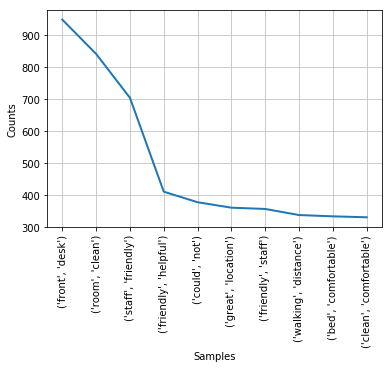

In [38]:
print('Bigrams Frequency Distribution')
nltk.FreqDist([item for sublist in corp_lemma_bigrams for item in sublist]).plot(10)

Trigrams Frequency Distribution


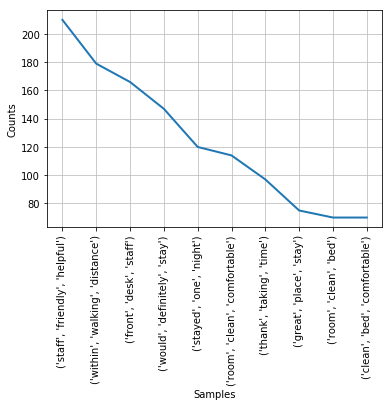

In [39]:
print('Trigrams Frequency Distribution')
nltk.FreqDist([item for sublist in corp_lemma_trigrams for item in sublist]).plot(10)

#### Skipgrams

One variation on N-grams are **skipgrams**. Skipgrams are similar to N-grams in that you are looking for items in your text that are of the same number of words (i.e. for bigrams, all items were two word pairs). However, the key difference is that you are allowed to "skip" words that appear in between. Skipgrams gets all N-word combinations of a review given the allowed number of words you can skip. Note that for skipgrams you need at least a two-gram (because there are no words between a single word!). Here is an example to better illustrate what skipgrams does.   

In [40]:
from nltk.util import skipgrams

sample_text = ['hello', 'welcome', 'informs', 'meetup', 'something', 'nltk']
bigram_sample = list(ngrams(sample_text, 2))
bigram_skip_sample = list(skipgrams(sample_text, 2, 2))

print('Tokenized comment: {}'.format(sample_text))
print('Example Bigrams: {}'.format(bigram_sample))
print('Example Trigrams with 2 word skip: {}'.format(bigram_skip_sample))

Tokenized comment: ['hello', 'welcome', 'informs', 'meetup', 'something', 'nltk']
Example Bigrams: [('hello', 'welcome'), ('welcome', 'informs'), ('informs', 'meetup'), ('meetup', 'something'), ('something', 'nltk')]
Example Trigrams with 2 word skip: [('hello', 'welcome'), ('hello', 'informs'), ('hello', 'meetup'), ('welcome', 'informs'), ('welcome', 'meetup'), ('welcome', 'something'), ('informs', 'meetup'), ('informs', 'something'), ('informs', 'nltk'), ('meetup', 'something'), ('meetup', 'nltk'), ('something', 'nltk')]


Notice that the number of "grams" in your list will grow exponentially as your N or number of allowed skips between words increases. Here is an example from our dataset when looking at trigrams and allowed 3 word skip:

In [41]:
print('Tokenized Comment (length {}): {}'.format(len(corp_lemma[0]), corp_lemma[0]))
print('Example Trigrams (length {}): {}'.format(len(corp_lemma_trigrams[0]), corp_lemma_trigrams[0]))

corp_lemma_skipgrams = [tuple(skipgrams(comment, 3, 3)) for comment in corp_lemma]
print('\nExample Trigrams with allowed 3 word skip (length {}):\n {}'.format(len(corp_lemma_skipgrams[0]), corp_lemma_skipgrams[0]))

Tokenized Comment (length 16): ['experience', 'rancho', 'valencia', 'absolutely', 'perfect', 'beginning', 'end', 'felt', 'special', 'happy', 'stayed', 'would', 'come', 'back', 'heart', 'beat']
Example Trigrams (length 14): (('experience', 'rancho', 'valencia'), ('rancho', 'valencia', 'absolutely'), ('valencia', 'absolutely', 'perfect'), ('absolutely', 'perfect', 'beginning'), ('perfect', 'beginning', 'end'), ('beginning', 'end', 'felt'), ('end', 'felt', 'special'), ('felt', 'special', 'happy'), ('special', 'happy', 'stayed'), ('happy', 'stayed', 'would'), ('stayed', 'would', 'come'), ('would', 'come', 'back'), ('come', 'back', 'heart'), ('back', 'heart', 'beat'))

Example Trigrams with allowed 3 word skip (length 120):
 (('experience', 'rancho', 'valencia'), ('experience', 'rancho', 'absolutely'), ('experience', 'rancho', 'perfect'), ('experience', 'rancho', 'beginning'), ('experience', 'valencia', 'absolutely'), ('experience', 'valencia', 'perfect'), ('experience', 'valencia', 'beginn

Like with N-grams, you can also use ```FreqDist``` with skipgrams

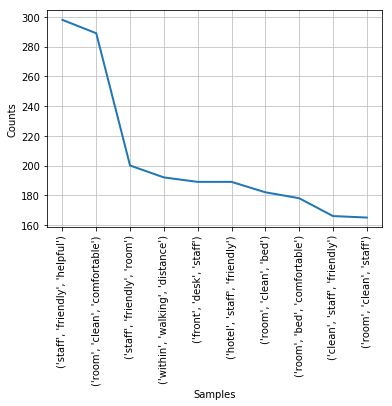

In [42]:
nltk.FreqDist([item for sublist in corp_lemma_skipgrams for item in sublist]).plot(10)

## Topic Modelling with Gensim

After all the definitions and data processing work, we can finally get to our model! 

### Topic Modelling

For topic modelling, we can use the package ```gensim```, which does topic modelling using a technique called Latent Dirichlet Allocation (https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation). At a high level, Latent Dirichlet Allocation is a statistical model that assigns probabilities of words being in a topic based on words in the review itself and words in all of the reviews. 

To get started with topic modelling, we first have to create corpus objects within Gensim so that it can run the analysis. To do this, we use the one of the corpus list of lists we defined earlier in the notebook. For the purposes of the analysis, we will use the ```corp_lemma``` variable as our corpus 

In [43]:
from gensim import corpora
dictionary = corpora.Dictionary(corp_norm)
corpus = [dictionary.doc2bow(text) for text in corp_norm]

Next, we will save the corpus in a format that can be used for a later visualization of results. To do this, we use the ```pickle``` package in python, which allows you to serialize or deserialize a Python object for later use (for more information on pickle, see the appendix).

In [44]:
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

Next, we define the number of topics we want the model to output, set parameters for the model, and run the model using the corpus and dictionary variables defined above.

In [45]:
import gensim
NUM_TOPICS = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS,
                                           id2word=dictionary, passes=20, random_state=12)
ldamodel.save('model.gensim')

Unfortunately, there is no set way to decide how to choose the number of topics. This part of the analysis is where domain knowledge and trial-and-error come into play. One way in ```gensim``` to interpret the topic modelling results is to print out the highest probability words within each topic

In [46]:
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.012*"la" + 0.008*"lodge" + 0.008*"u" + 0.007*"en" + 0.007*"curtains"')
(1, '0.047*"not" + 0.041*"room" + 0.016*"hotel" + 0.012*"no" + 0.011*"night"')
(2, '0.014*"place" + 0.007*"best" + 0.006*"virginia" + 0.006*"years" + 0.006*"santa"')
(3, '0.041*"room" + 0.019*"bed" + 0.017*"clean" + 0.016*"nice" + 0.014*"no"')
(4, '0.038*"good" + 0.037*"hotel" + 0.037*"clean" + 0.037*"staff" + 0.032*"great"')
(5, '0.022*"„" + 0.014*"aria" + 0.010*"anaheim" + 0.008*"stadium" + 0.006*"hotel"')
(6, '0.021*"not" + 0.020*"staff" + 0.020*"hotel" + 0.018*"breakfast" + 0.014*"room"')
(7, '0.029*"thank" + 0.017*"us" + 0.015*"service" + 0.014*"hotel" + 0.013*"review"')
(8, '0.023*"stayed" + 0.021*"inn" + 0.015*"stay" + 0.015*"hotel" + 0.015*"staff"')
(9, '0.027*"hotel" + 0.018*"great" + 0.013*"not" + 0.010*"stay" + 0.010*"pool"')


Another handy way to interpret the topic modelling results is by utilizing ```pyLDAvis```, a topic modelling visualization package that is supplemental to ```gensim```.  The ```pyLDAvis``` package takes the results from your gensim model to create the visualization.

In [47]:
# Use pyLDA to visualize topics
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model.gensim')

import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)

Below is a visualization of the topic modeling results. The visualization has several helpful features to understand the topics generated by the model.

1. On the left side, there is a distance map that shows how close in similarity each topic is relative to one another, as well as the size of the topic relative to the entire corpus of comments
2. Based on the topic you hover over/select on the left side, the right side updates with a bar chart of the top 30 words within that topic. The bar chart has a blue bar that shows the overall term frequency, and a red bar that shows the estimated term frequency within the selected topic. 
    a. Note that when no topic is selected, the bar chart on the right only shows overall term frequencies
3. On the top right, there is a slider that can be used to adjust how much weight the visualization places on how relevent a given word is to the selected topic vs. the overall term frequency. A lower value of $\lambda$ means that more weight is placed on the topic relevancy of words. For example, if a word in the topic only appears in the selected topic, it will be given more weight over a word that appears with a high frequency in the corpus. 

In [48]:
pyLDAvis.display(lda_display)

### Assigning Comments to Topics

Based on the visualization, the topics generated become a lot more clear. Now, to finish off the algorithm, we want to label the topics and map them to each comment.

In [49]:
# Example of labelling topics for the Hotel sample dataset

# Define your topic categories based on topic model analysis above
topic_cats = {0:'Spanish Reviews',
              1:'Dirty/Noisy Room',
              2:'Location',
              3:'Room Utilities',
              4:'Good Experience',
              5:'Anaheim Stadium',
              6:'Front Desk',
              7:'Thank You',
              8:'Hotel Stay',
              9:'Scenery'}


# Get topic numbers from LDA model for each review
corpus_topics = list(ldamodel.get_document_topics(corpus))


# Map topic label numbers to topic category names
topic_labels = []
for comment in corpus_topics:
    probs = {k:v for k, v in comment}
    best_topic = max(probs, key=lambda key: probs[key])
    topic_labels.append(topic_cats[best_topic])

Finally, we add a column for the topic labels to the dataset. 

In [50]:
# Add topic label column to dataset
data['topic'] = topic_labels

pd.set_option('max_colwidth', 120)
display(data[['reviews.text', 'topic']].head(10))

,reviews.text,topic
0,Our experience at Rancho Valencia was absolutely perfect from beginning to end!!!! We felt special and very happy du...,Scenery
1,Amazing place. Everyone was extremely warm and welcoming. We've stayed at some top notch places and this is definite...,Front Desk
2,"We booked a 3 night stay at Rancho Valencia to play some tennis, since it is one of the highest rated tennis resorts...",Scenery
3,Currently in bed writing this for the past hr 1/2 there have been dogs barking and squealing call the front desk to ...,Dirty/Noisy Room
4,I live in Md and the Aloft is my Home away from home...we stayed 1 night 7-7-16 ...Staff is great ! Especially Olivi...,Hotel Stay
5,"I stayed here with my family for my daughters wedding. It had a very accommodating staff, Olivia was excellent. The ...",Hotel Stay
6,"Beautiful rooms and the nicest people working there. The front desk lady, Olivia, was extremely patient and helpful....",Front Desk
7,"We stayed here while visiting Maryland Live!. Cute hotel in a great location. Clean, with a very modern look, upgrad...",Good Experience
8,"I travel a lot with my job, so I'm constantly staying at hotels. When my co-workers and I arrived late last night at...",Front Desk
9,"In my line of work, I use meeting space in hotels often. In my 15+ years of doing this work, this is the first time ...",Dirty/Noisy Room


## Rule Based Categorization

While using an unsupervised approach such as topic modelling can be effective in some business cases, other business cases may required a more targeted approach. Perhaps the business user has specific categories in mind that they would like to explore in the data. In this case, a more brute force rule based application may be more desired.

### Tagging Basics

The following section will cover some basic strategies for rule based tagging. Namely, single tagging and bigram tagging.

#### Single Tagging

*How does it work?* Compare each individual word with a dictionary of words associated with a category

In [51]:
# Toy Example
comment = 'Love the product. Communication was great and delivery was fast! Thanks!'

# Tokenized comment from cell above ('Love the shoes. Communication was great and delivery was fast! Thanks!')
tokenized_text = tokenize(comment)

# Words associated with the category, 'Fast Delivery' (NOTE: not full list)
fast_delivery_words = ['fast','quick','speedy','prompt']

# Loop through each word in tokenized comment. If word is in fast_delivery_words, then tag
for word in tokenized_text:
    print('Is "{}" in {}??'.format(word, fast_delivery_words), end='\t----> ', flush=True)
    if word in fast_delivery_words:
        print('Yes! Tag this comment as "Fast Delivery".')
        break
    else:
        print('No, keep going')

Is "Love" in ['fast', 'quick', 'speedy', 'prompt']??	----> No, keep going
Is "product" in ['fast', 'quick', 'speedy', 'prompt']??	----> No, keep going
Is "." in ['fast', 'quick', 'speedy', 'prompt']??	----> No, keep going
Is "Communication" in ['fast', 'quick', 'speedy', 'prompt']??	----> No, keep going
Is "great" in ['fast', 'quick', 'speedy', 'prompt']??	----> No, keep going
Is "delivery" in ['fast', 'quick', 'speedy', 'prompt']??	----> No, keep going
Is "fast" in ['fast', 'quick', 'speedy', 'prompt']??	----> Yes! Tag this comment as "Fast Delivery".


#### Bigram Tagging

*How does it work?* Same as with single tagging but in this case we are comparing *pairs* of words with a word dictionary of *paired* words

In [52]:
# Toy Example - Sad hat guy (real comment)

comment = '''I never got my hat! It said t was delivered at 6am on a Saturday but I would’ve been home 
then and I never heard a knock (also who delivers packages at 6am?). I want my hat :( I am sad without 
my hat :( Please send a new hat to my work address so I can have a hat :('''

# Tokenize
tokenized_text = tokenize(comment)

# Extract pairs of words. Can be done using nltk.bigrams (text must be tokenized first)
text_bigrams = nltk.bigrams(tokenized_text)

print('Bigrams: {}\n'.format(list(text_bigrams)))

# Words associated with the category, 'Not Received' (NOTE: not full list)
not_received_pairs = (('not', 'received'), ('never', 'got'))

print('Loop through comment:')
# Loop through each word pair. If word pair (or it's reversed pair) is in not_received_words, then tag
for bigram in nltk.bigrams(tokenized_text):
    print('Is "{}" in {}??'.format(bigram, not_received_pairs), end='\t----> ', flush=True)
    # Need to check reverse of pair as well because order matters when checking pairs
    if bigram in not_received_pairs or tuple(reversed(bigram)) in not_received_pairs:
        print('Yes! Tag this comment as "Not Received".')
        break
    else:
        print('No, keep going')

Bigrams: [('I', 'never'), ('never', 'got'), ('got', 'hat'), ('hat', '!'), ('!', 'It'), ('It', 'said'), ('said', 'delivered'), ('delivered', '6am'), ('6am', 'Saturday'), ('Saturday', 'I'), ('I', 'would'), ('would', '’'), ('’', 'home'), ('home', 'I'), ('I', 'never'), ('never', 'heard'), ('heard', 'knock'), ('knock', '('), ('(', 'also'), ('also', 'delivers'), ('delivers', 'packages'), ('packages', '6am'), ('6am', '?'), ('?', ')'), (')', '.'), ('.', 'I'), ('I', 'want'), ('want', 'hat'), ('hat', ':'), (':', '('), ('(', 'I'), ('I', 'sad'), ('sad', 'without'), ('without', 'hat'), ('hat', ':'), (':', '('), ('(', 'Please'), ('Please', 'send'), ('send', 'new'), ('new', 'hat'), ('hat', 'work'), ('work', 'address'), ('address', 'I'), ('I', 'hat'), ('hat', ':'), (':', '(')]

Loop through comment:
Is "('I', 'never')" in (('not', 'received'), ('never', 'got'))??	----> No, keep going
Is "('never', 'got')" in (('not', 'received'), ('never', 'got'))??	----> Yes! Tag this comment as "Not Received".


### Negation and Secondary Terms

Tagging by individual words and pairs of words can be effective for basic tagging, but there are some scenarios where this approach can misclassify comments due to words that reverse sentence meaning or because there isn't enough context.

#### But wait, NO (checking for negation terms)

Sometimes, you don't want to tag a comment, even though the word appears in the word dictionary. The reason is that the customer may be expressing a reverse sentiment from what the category implies.

**EXAMPLE:** ```'The packaging and shipping was good as usual since there was NO damages to the box and the product came on time.'```

In the above case, you do NOT want to tag this as damage to the box. So, we must in some cases check the surrounding words before tagging.

First, we define a way to look at words surrounding a word that appears in the word dictionary

In [53]:
'''
- INPUT:
    1. tokenized_text - Text in tokenized form (can use token_simple function or any other tokenizer)
    2. index - Index of the comment word that appears in the word dictionary (the word that you are checking around 
    to see if there is a negation term)
    3. check_type - Where you want to be checking. Do you want to look at the words that came BEFORE the comment 
    word, AFTER the comment word, or BOTH?
    4. ctr - HOW MANY words nearest to the comment word you want to look at (default is 3)

- OUTPUT:
    Tokenized list showing only words you want around the comment word
'''
def surrounding_words(tokenized_text, index, check_type='backward', ctr=None):

    # Check how many words before and/or after the word that you want to check
    if ctr is None:
        ctr = 3
    else:
        assert type(ctr) is int, 'ctr is not an int'
    
    # Get words that occur BEFORE the given index 
    # (number of words equal to ctr OR the number available words before index)
    if check_type == 'backward':
        if index - ctr < 0:
            word_check = tokenized_text[0:index]
            if len(word_check) == 0:
                return tokenized_text
        else:
            word_check = tokenized_text[index-ctr:index]
    
    # Get words that occur AFTER the given index 
    # (number of words equal to ctr OR the number available words after index)         
    elif check_type == 'forward':
        if index + ctr >= len(tokenized_text):
            word_check = tokenized_text[index:len(tokenized_text)]
            if len(word_check) == 0:
                return tokenized_text
        else:
            word_check = tokenized_text[index:index+ctr+1]
    
    # Get words that occur before AND after the given index 
    # (number of words before and after equal to ctr OR the number available words before and after index)
    elif check_type == 'both':
        if index - ctr < 0 and index + ctr < len(tokenized_text):
            word_check = tokenized_text[0:index+ctr+1]
        elif index - ctr > 0 and index + ctr >= len(tokenized_text):
            word_check = tokenized_text[index-ctr:len(tokenized_text)]
        elif index - ctr < 0 and index + ctr >= len(tokenized_text):
            word_check = tokenized_text[:]
        else:
            word_check = tokenized_text[index-ctr:index+ctr+1]
        if len(word_check) == 0:
            return tokenized_text

    # Return list of surrounding words
    return word_check

In [54]:
# Example comment
comment = 'The packaging and shipping was good as usual since there was NO damages to the box and the product came on time.'

# Tokenize
tokenized_text = tokenize(comment)

# Let's say we are looking for comments refering to damage, and we find an occurance of damage at a particular index
damage_index = tokenized_text.index('damages')

# Now, we can use the surrounding_words function to find the words surrounding the word 'damages'
print('Here are the words surrounding the occurance of the word "damages":')
print(surrounding_words(tokenized_text, damage_index, check_type='both'))

Here are the words surrounding the occurance of the word "damages":
['usual', 'since', 'NO', 'damages', 'box', 'product', 'came']


So, how do we use this to determine if we should tag a comment or not? Basically, we need to check the surrounding words against a second word dictionary containing negation terms. In addition, we need to integrate this check into the previous steps. Below is an example of how you would combine single tagging with negation terms: 

In [55]:
# Example comment
comment = 'The packaging and shipping was good as usual since there was no damages to the box and the product came on time.'

# Tokenize
tokenized_text = tokenize(comment)

# Words associated with the category, 'Damage' (NOTE: not full list)
damage_words = ['damage','damages']

# We need a second dictionary of negation terms to check against (NOTE: not full list)
negation_words = ['no', 'not', 'wasnt']

# Define a flag to indicate if negation term found
flg = 0

# Loop through each word in tokenized comment. 
# We use enumerate here to keep track of which index we are on in the tokenized comment
for index, word in enumerate(tokenized_text):
    if flg == 1:
        break
    print('Is "{}" in {}??'.format(word, damage_words), end='\t----> ', flush=True)
    if word in damage_words:
        print('Yes! But wait, lets check if there is a negation term')
        # Define the surrounding words space
        surrounding = surrounding_words(tokenized_text, index, check_type='both')
        print('\nsurrounding words: {}\n'.format(surrounding))
        for w in surrounding:
            print('Is "{}" in {}??'.format(w, negation_words), end='\t----> ', flush=True)
            if w in negation_words:
                print('Oh no! A negation term! DO NOT TAG')
                flg += 1
                break
            else:
                print('Still okay, no negations')
    else:
        print('No, keep going')

Is "The" in ['damage', 'damages']??	----> No, keep going
Is "packaging" in ['damage', 'damages']??	----> No, keep going
Is "shipping" in ['damage', 'damages']??	----> No, keep going
Is "good" in ['damage', 'damages']??	----> No, keep going
Is "usual" in ['damage', 'damages']??	----> No, keep going
Is "since" in ['damage', 'damages']??	----> No, keep going
Is "no" in ['damage', 'damages']??	----> No, keep going
Is "damages" in ['damage', 'damages']??	----> Yes! But wait, lets check if there is a negation term

surrounding words: ['usual', 'since', 'no', 'damages', 'box', 'product', 'came']

Is "usual" in ['no', 'not', 'wasnt']??	----> Still okay, no negations
Is "since" in ['no', 'not', 'wasnt']??	----> Still okay, no negations
Is "no" in ['no', 'not', 'wasnt']??	----> Oh no! A negation term! DO NOT TAG


#### But wait, YES (using surrounding words to confirm a tag)

Sometimes, instead of wanting to NOT tag a comment where there is a negation term nearby, you want to tag ONLY WHEN there is a secondary term near the first term.

For example, say you want to tag a comment as "damage box" and you have the following comment:

```my package showed up as if ace ventura was the delivery guy. my package showed up as if the UPS guy kicked a field goal with the box before he dropped it off, the box is completely wrecked, and i usually like to keep them. luckily, the product itself is fine, but i’m very disappointed with how they showed up```

(*Note:* Real Comment)

In this comment, we know that the comment has to do with damage, because on the second line it says: "...the shoe box is completely **wrecked**...", but we can't tag it as damage to the box without getting the second key word in the phrase: "...the **box** is completely wrecked". Fortunately, we can use our surrounding words function to get the second key word.

In [56]:
# Example comment
comment = '''
The box is completely wrecked, and i usually like to keep them. luckily, the product itself
is fine, but i’m very disappointed with how they showed up
'''

# Tokenize
tokenized_text = tokenize(comment)

# Words associated with the category, 'Damage' (NOTE: not full list)
damage_words = ['damage','damages', 'wrecked']

# Second dictionary of words associated with boxes (NOTE: not full list)
package_words = ['box', 'package']

# Define a flag to indicate if second term found
flg = 0

# Loop through each word in tokenized comment. 
# We use enumerate here to keep track of which index we are on in the tokenized comment
for index, word in enumerate(tokenized_text):
    if flg == 1:
        break
    print('Is "{}" in {}??'.format(word, damage_words), end='\t----> ', flush=True)
    if word in damage_words:
        print('Yes! But wait, lets check if we have the second term')
        # Define the surrounding words space
        surrounding = surrounding_words(tokenized_text, index, check_type='both', ctr=5)
        print('\nsurrounding words: {}\n'.format(surrounding))
        for w in surrounding:
            print('Is "{}" in {}??'.format(w, package_words), end='\t----> ', flush=True)
            if w in package_words:
                print('Yes! A second term! TAG TAG TAG')
                flg += 1
                break
            else:
                print('Still no second term...')
    else:
        print('No, keep going')

Is "The" in ['damage', 'damages', 'wrecked']??	----> No, keep going
Is "box" in ['damage', 'damages', 'wrecked']??	----> No, keep going
Is "completely" in ['damage', 'damages', 'wrecked']??	----> No, keep going
Is "wrecked" in ['damage', 'damages', 'wrecked']??	----> Yes! But wait, lets check if we have the second term

surrounding words: ['The', 'box', 'completely', 'wrecked', ',', 'usually', 'like', 'keep', '.']

Is "The" in ['box', 'package']??	----> Still no second term...
Is "box" in ['box', 'package']??	----> Yes! A second term! TAG TAG TAG


### Applying Tags

Based on the above tagging approaches, we can mix and match to further improve our tagging accuracy:
1. Single tag, no negation, no second term
2. Single tag, check negation (single words), no second term
3. Single tag, no negation, check second term (single words)
4. Single tag, check negation (bigrams), no second term
5. Single tag, no negation, check second term (bigrams)
6. Bigram tag, no negation, no second term
7. Bigram tag, check negation (single words), no second term
8. Bigram tag, no negation, check second term (single words)
9. Bigram tag, check negation (bigrams), no second term
10. Bigram tag, no negation, check second term (bigrams)

The following function below allows you to tag your comments based on one of the 10 scenarios highlighted above

In [57]:
def tag_data(df, review_col, tag_col, word_list, check=False, check_type='backward', ctr=3, terms=None, negation=False):
    result = df.copy().reset_index()
    indexes = []
    for index, comment in enumerate(result[review_col]):
        # Ignore surveys that don't have a comment
        if type(comment) == float:
            continue

        # Tokenize comment
        tokenized_comment = tokenize(comment)

        # One word check if word dictionary is list (scenarios 1-5)
        if type(word_list) == list:
            if check == False:
                if any(x in tokenized_comment for x in word_list):
                    indexes.append(index)
            elif check == True:
                for item, word in enumerate(tokenized_comment):
                    if word in word_list:
                        if type(terms) == list:
                            if any(x in surrounding_words(tokenized_comment, item, 
                                                          check_type=check_type, ctr=ctr) for x in terms):
                                if negation == False:
                                    indexes.append(index)
                                    break
                                elif negation == True:
                                    break
                            else:
                                if negation == False:
                                    break
                                if negation == True:
                                    indexes.append(index)
                                    break
                        elif type(terms) == tuple:
                            surrounding = surrounding_words(tokenized_comment, item, check_type=check_type, ctr=ctr)
                            for ind, bigram in enumerate(nltk.bigrams(surrounding)):
                                if bigram in terms or tuple(reversed(bigram)) in terms:
                                    if negation == False:
                                        indexes.append(index)
                                        break
                                    elif negation == True:
                                        break
                                else:
                                    if ind == (len(list(nltk.bigrams(surrounding))) - 1):
                                        if negation == False:
                                            break
                                        elif negation == True:
                                            indexes.append(index)
                                            break
                                    else:
                                        continue  
        
        # Bigram check if word dictionary is tuple (scenarios 6-10)
        elif type(word_list) == tuple:
            if check == False:
                for word in nltk.bigrams(tokenized_comment):
                    if word in word_list or tuple(reversed(word)) in word_list:
                        indexes.append(index)
                        break
            elif check == True:
                for item, word in enumerate(nltk.bigrams(tokenized_comment)):
                    if word in word_list or tuple(reversed(word)) in word_list:
                        if type(terms) == list:
                            if any(x in surrounding_words(tokenized_comment, item,
                                                          check_type=check_type, ctr=ctr) for x in terms):
                                if negation == False:
                                    indexes.append(index)
                                    break
                                elif negation == True:
                                    break
                            else:
                                if negation == False:
                                    break
                                if negation == True:
                                    indexes.append(index)
                                    break
                        if type(terms) == tuple:
                            surrounding = surrounding_words(tokenized_comment, item, check_type=check_type, ctr=ctr)
                            for ind, bigram in enumerate(nltk.bigrams(surrounding)):
                                if bigram in terms or tuple(reversed(bigram)) in terms:
                                    if negation == False:
                                        indexes.append(index)
                                        break
                                    elif negation == True:
                                        break
                                else:
                                    if ind == (len(list(nltk.bigrams(surrounding))) - 1):
                                        if negation == False:
                                            break
                                        elif negation == True:
                                            indexes.append(index)
                                            break
                                    else:
                                        continue
    
    tag_rows = result[result.index.isin(indexes)]
    tag_row_comments = tag_rows[review_col].unique()
    
    result[tag_col] = result.apply(lambda x: 1 if x[review_col] in tag_row_comments else 0, axis=1)
    
    return result

To close, here are some examples of rule based tagging in action. Here, we have three examples: *good experience (with negation check)*, *food*, and *front desk*. There are two steps to the analysis:

1. Define the dictionary of terms you want to match to
2. Run the tag data function, applying the appropriate tag scenario

In [58]:
# Step 1 - Define Dictionary of terms

# Good Experience
good_experience = ['great', 'nice', 'good', 'awesome', 'wonderful', 'amazing', 'perfect']
negation = ['no', 'not', 'wasnt']

# Food
food = ['food', 'breakfast', 'lunch', 'dinner']

# Front Desk
front_desk = ('front', 'desk')

In [59]:
# Step 2 - Run Tag Data Function with appropriate tag scenario

good_experience_tag = tag_data(data, 'reviews.text', 'good experience', good_experience, 
                               check=True, check_type='backward', ctr=3, terms=negation, negation=True)

food_tag = tag_data(data, 'reviews.text', 'food', food)

front_desk_tag = tag_data(data, 'reviews.text', 'front_desk', front_desk)

In [60]:
# Example of comments tagged as good experience

good_experience_tag[good_experience_tag['good experience'] == 1][['reviews.text', 'good experience']].iloc[0:10]

,reviews.text,good experience
0,Our experience at Rancho Valencia was absolutely perfect from beginning to end!!!! We felt special and very happy du...,1
2,"We booked a 3 night stay at Rancho Valencia to play some tennis, since it is one of the highest rated tennis resorts...",1
4,I live in Md and the Aloft is my Home away from home...we stayed 1 night 7-7-16 ...Staff is great ! Especially Olivi...,1
7,"We stayed here while visiting Maryland Live!. Cute hotel in a great location. Clean, with a very modern look, upgrad...",1
10,"The staff is very friendly and helpful. The rooms are large and nicely furnished. Feels new, as if we were the first...",1
11,"Very friendly staff, great free breakfast items each morning, room and facilities very clean, staff superb! We had a...",1
13,This is a nice hotel with great staff. I have young children and the entire staff from the front desk staff to the b...,1
20,Everything was sold out in State College for Garth's concerts and the Inn came up as available...what an amazing fin...,1
21,I work here in Perry about 6 days out of the week. The People here are very friendly and willing to make your stay b...,1
22,The hotel is just one of many that are on this new trend of firmer pillows and mattresses. This is the third hotel I...,1


## Closing Remarks

Thank you for going through this tutorial notebook on text analytics in Python! If you have any questions on any of the material covered, please feel free to reach out at **michaeljcho29@gmail.com**

## Appendix

### Sources:

NLTK Online Textbook
1. http://www.nltk.org/book/

Stemming and Lemmatization 
1. https://towardsdatascience.com/stemming-lemmatization-what-ba782b7c0bd8
2. https://www.datacamp.com/community/tutorials/stemming-lemmatization-python
3. https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

Topic Modelling with Gensm
1. https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21

Pickle
1. https://docs.python.org/3/library/pickle.html
2. https://www.geeksforgeeks.org/understanding-python-pickling-example/

pyLDAvis
1. https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf